In [14]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [15]:
classifier = Sequential()

classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

In [16]:
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Flatten())

classifier.add(Dense(activation = 'relu',units=128))
classifier.add(Dense(activation = 'sigmoid',units=1))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total para

In [17]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)


In [18]:
import os 
os.getcwd()
os.chdir('C:/Deep Learning Applications in/code/Brain_tumor')
print(os.getcwd())

C:\Deep Learning Applications in\code\Brain_tumor


In [19]:
training_set = train_datagen.flow_from_directory('C:/Deep Learning Applications in/code/Brain_tumor/train/',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('C:/Deep Learning Applications in/code/Brain_tumor/test/',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')


Found 44 images belonging to 2 classes.
Found 14 images belonging to 2 classes.


In [20]:
classifier.fit_generator(training_set, steps_per_epoch=1, epochs=100, verbose=1, callbacks=None, validation_data=test_set, validation_steps=1, class_weight=None, max_queue_size=10, workers=1, use_multiprocessing=False, shuffle=True, initial_epoch=0)
     

Epoch 1/100
1/1 [==============================] - 1s 835ms/step - loss: 0.6925 - acc: 0.5000 - val_loss: 0.7868 - val_acc: 0.5714
Epoch 2/100
1/1 [==============================] - 0s 113ms/step - loss: 0.6627 - acc: 0.6667 - val_loss: 0.6427 - val_acc: 0.5714
Epoch 3/100
1/1 [==============================] - 0s 204ms/step - loss: 0.6629 - acc: 0.5938 - val_loss: 0.8045 - val_acc: 0.4286
Epoch 4/100
1/1 [==============================] - 0s 112ms/step - loss: 0.7381 - acc: 0.5000 - val_loss: 0.7998 - val_acc: 0.4286
Epoch 5/100
1/1 [==============================] - 0s 245ms/step - loss: 0.7055 - acc: 0.4375 - val_loss: 0.7147 - val_acc: 0.4286
Epoch 6/100
1/1 [==============================] - 0s 117ms/step - loss: 0.6233 - acc: 0.7500 - val_loss: 0.6795 - val_acc: 0.2857
Epoch 7/100
1/1 [==============================] - 0s 218ms/step - loss: 0.5890 - acc: 0.8125 - val_loss: 0.6628 - val_acc: 0.7143
Epoch 8/100
1/1 [==============================] - 0s 120ms/step - loss: 0.7144 - a

Epoch 64/100
1/1 [==============================] - 0s 118ms/step - loss: 0.4158 - acc: 0.8333 - val_loss: 1.8287 - val_acc: 0.4286
Epoch 65/100
1/1 [==============================] - 0s 202ms/step - loss: 0.1702 - acc: 0.9375 - val_loss: 1.6782 - val_acc: 0.2857
Epoch 66/100
1/1 [==============================] - 0s 105ms/step - loss: 0.0782 - acc: 1.0000 - val_loss: 1.7243 - val_acc: 0.4286
Epoch 67/100
1/1 [==============================] - 0s 206ms/step - loss: 0.3969 - acc: 0.7188 - val_loss: 1.6612 - val_acc: 0.2857
Epoch 68/100
1/1 [==============================] - 0s 107ms/step - loss: 0.0839 - acc: 1.0000 - val_loss: 1.7133 - val_acc: 0.4286
Epoch 69/100
1/1 [==============================] - 0s 206ms/step - loss: 0.1239 - acc: 0.9688 - val_loss: 1.9435 - val_acc: 0.4286
Epoch 70/100
1/1 [==============================] - 0s 106ms/step - loss: 0.2252 - acc: 0.8333 - val_loss: 1.9733 - val_acc: 0.4286
Epoch 71/100
1/1 [==============================] - 0s 208ms/step - loss: 0.

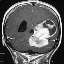

In [21]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('C:/Deep Learning Applications in/code/TestImages/brain-tumors-fig2_large.jpg', target_size = (64, 64))
test_image

In [22]:
test_image = image.img_to_array(test_image)

test_image = np.expand_dims(test_image, axis = 0)
test_image

array([[[[57., 57., 57.],
         [11., 11., 11.],
         [11., 11., 11.],
         ...,
         [11., 11., 11.],
         [11., 11., 11.],
         [10., 10., 10.]],

        [[14., 14., 14.],
         [14., 14., 14.],
         [11., 11., 11.],
         ...,
         [10., 10., 10.],
         [10., 10., 10.],
         [ 9.,  9.,  9.]],

        [[12., 12., 12.],
         [10., 10., 10.],
         [11., 11., 11.],
         ...,
         [11., 11., 11.],
         [11., 11., 11.],
         [11., 11., 11.]],

        ...,

        [[63., 63., 63.],
         [60., 60., 60.],
         [93., 93., 93.],
         ...,
         [11., 11., 11.],
         [11., 11., 11.],
         [11., 11., 11.]],

        [[23., 23., 23.],
         [ 5.,  5.,  5.],
         [ 8.,  8.,  8.],
         ...,
         [11., 11., 11.],
         [11., 11., 11.],
         [11., 11., 11.]],

        [[13., 13., 13.],
         [13., 13., 13.],
         [15., 15., 15.],
         ...,
         [ 9.,  9.,  9.],
        

In [23]:
result = classifier.predict(test_image)
result

array([[1.]], dtype=float32)

In [24]:
training_set.class_indices

{'Benign': 0, 'Malignant': 1}

In [25]:
if result[0][0] == 0:
    prediction = 'Benign'
else:
    prediction = 'Malignent'
print("Detected tumor type is %s"%prediction)


Detected tumor type is Malignent
